<h1 style="color:DodgerBlue;">Decision Tree Algorithm </h1>

## Table of Contents
1. Introduction
2. Algorithm Overview
3. Decision Tree Construction
   - Entropy and Information Gain
   - Gini Impurity
4. Decision Tree Learning Process
   - Recursive Binary Splitting
   - Stopping Criteria
5. Advantages and Disadvantages
6. Implementation Example
7. Conclusion

## 1. Introduction
The Decision Tree algorithm is a widely used machine learning technique for classification and regression tasks. It's a type of supervised learning algorithm that builds a tree-like structure to make decisions based on features of the data. The tree consists of nodes that represent attributes, branches representing decisions, and leaves representing class labels or predicted values.
## 2. Algorithm Overview
A decision tree is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm. It is a versatile supervised machine-learning algorithm, which is used for both classification and regression problems. It is one of the very powerful algorithms.

<img src="https://365datascience.com/resources/blog/rr6cuudl59r-decision-trees-image1.png" width=650 height=250/>

**Root Node:** It is the topmost node in the tree,  which represents the complete dataset. It is the starting point of the decision-making process.
<br>**Decision/Internal Node:** A node that symbolizes a choice regarding an input feature. Branching off of internal nodes connects them to leaf nodes or other internal nodes.
<br>**Leaf/Terminal Node:** A node without any child nodes that indicates a class label or a numerical value.
<br>**Splitting:** The process of splitting a node into two or more sub-nodes using a split criterion and a selected feature.
<br>**Branch/Sub-Tree:** A subsection of the decision tree starts at an internal node and ends at the leaf nodes.
<br>**Parent Node:** The node that divides into one or more child nodes.
<br>**Child Node:** The nodes that emerge when a parent node is split.
## 3. Decision Tree Construction
### - Entropy and Information Gain
Entropy is a measure of impurity or randomness within a set. In Decision Trees, entropy is used to quantify the disorder in the target classes within each node. Information Gain is the reduction in entropy achieved by partitioning the data based on a particular attribute. The attribute with the highest Information Gain is chosen as the decision node.
<img src="https://lh6.googleusercontent.com/zIqBAfLr8tZJM6BzE00QvL0EV6sqRNW-uS93HgnJnySmLSDCLYLWtTY8LKF2G5Y_-fXLPnfHjEuNk5BJJDFf4ESSIlzC1nQKMuLZwYMrmPxmEPVnzW01SAu55NadMItLb-aV62vI1r7GHwsQyg" width=250 height=250 />

### - Gini Impurity
Gini Impurity is another criterion to measure impurity in a set. It calculates the probability of a randomly chosen element being misclassified. Similar to Information Gain, Decision Trees use Gini Impurity to decide the best attribute for splitting.
<img src="https://static.wixstatic.com/media/02b811_5df05513ffd4487d843bb401dfa5e0cb~mv2.png/v1/fill/w_431,h_165,al_c,lg_1,q_85,enc_auto/02b811_5df05513ffd4487d843bb401dfa5e0cb~mv2.png" width=200 height=200 />

## 4. Decision Tree Learning Process
### - Recursive Binary Splitting
The process starts at the root node, where the entire dataset is considered. The algorithm identifies the attribute that provides the best split based on the chosen impurity measure (Entropy or Gini Impurity). The data is then divided into subsets based on the attribute's values. This process is recursively repeated for each subset until a stopping condition is met.

### - Stopping Criteria
Stopping criteria prevent the tree from becoming too deep and overfitting the training data. Common stopping criteria include:
- Maximum depth of the tree.
- Minimum number of samples required to split a node.
- Minimum number of samples required in a leaf node.
- Maximum number of leaf nodes.

## 5. Advantages and Disadvantages
### Advantages:
- Intuitive and easy to interpret.
- Handles both categorical and numerical data.
- Implicit feature selection, as important attributes tend to appear higher in the tree.
- Non-linear relationships between features and target can be captured.

### Disadvantages:
- Prone to overfitting, especially with deep trees.
- Sensitive to small variations in the training data.
- May not generalize well to unseen data if not pruned properly.
- Can create complex trees that are hard to interpret.

## 6. Implementation Example
Below is an example implementation of the Decision Tree algorithm using the Breast Cancer dataset from Kaggle.

## 7. Conclusion
Decision Trees are versatile and powerful tools in the realm of machine learning. They provide interpretable models that can capture complex relationships within the data. However, careful tuning and pruning are necessary to prevent overfitting and ensure generalization to new data. By understanding the underlying concepts and nuances of Decision Trees, data scientists can make informed decisions when constructing and using these models for various tasks.

#### Import necessary libraries
 Import the necessary libraries for data manipulation, model training, evaluation, and visualization.

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import Image
from IPython.core.display import HTML 

#### Load the dataset & Explore the dataset
Display the first few rows of the dataset and print its information to understand its structure.

In [30]:
data = pd.read_csv("C:/Users/varsh/Documents/MSc/ML_Algo/Classification/Breast Cancer.csv")

# 
data.head()

,id,diagnosis,radius_1ean,texture_1ean,peri1eter_1ean,area_1ean,s1oothness_1ean,co1pactness_1ean,concavity_1ean,concave points_1ean,...,radius_worst,texture_worst,peri1eter_worst,area_worst,s1oothness_worst,co1pactness_worst,concavity_worst,concave points_worst,sy11etry_worst,fractal_di1ension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_1ean              569 non-null    float64
 3   texture_1ean             569 non-null    float64
 4   peri1eter_1ean           569 non-null    float64
 5   area_1ean                569 non-null    float64
 6   s1oothness_1ean          569 non-null    float64
 7   co1pactness_1ean         569 non-null    float64
 8   concavity_1ean           569 non-null    float64
 9   concave points_1ean      569 non-null    float64
 10  sy11etry_1ean            569 non-null    float64
 11  fractal_di1ension_1ean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri1eter_se             5

In [32]:
#Dropping id since it does not make any sense
data = data.drop('id', axis=1)

####  Separate features and target variable
Separate the features as (X) and the target variable as (y) from the dataset.
<br>The target variable here is type of the diabetes malignant(1) and benign(0)

In [33]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

#### Split the data into training and testing sets
Split the data into training and testing sets using a 80-20 split ratio. This allows us to evaluate the model's performance on unseen data.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Initialize the Decision Tree model
Create an instance of the DecisionTreeClassifier with a specified random state for reproducibility.
<br>Train the Decision Tree model using the training data (X_train and y_train).
<br>Use the trained model to make predictions on the test data (X_test).

In [35]:
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

#### Calculate Performance
Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



C:\Users\varsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


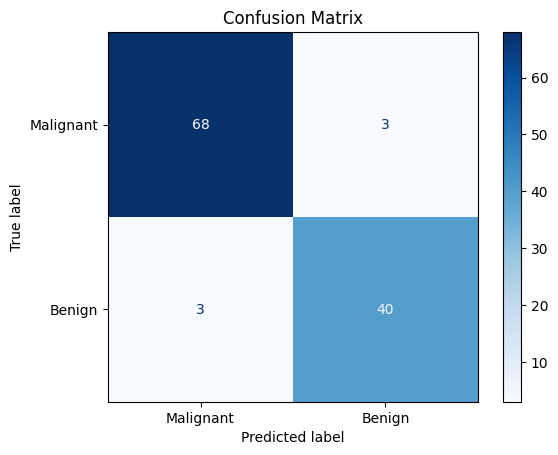

In [49]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Visualize the confusion matrix
plot_confusion_matrix(dt_model, X_test, y_test, display_labels=["Malignant", "Benign"], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

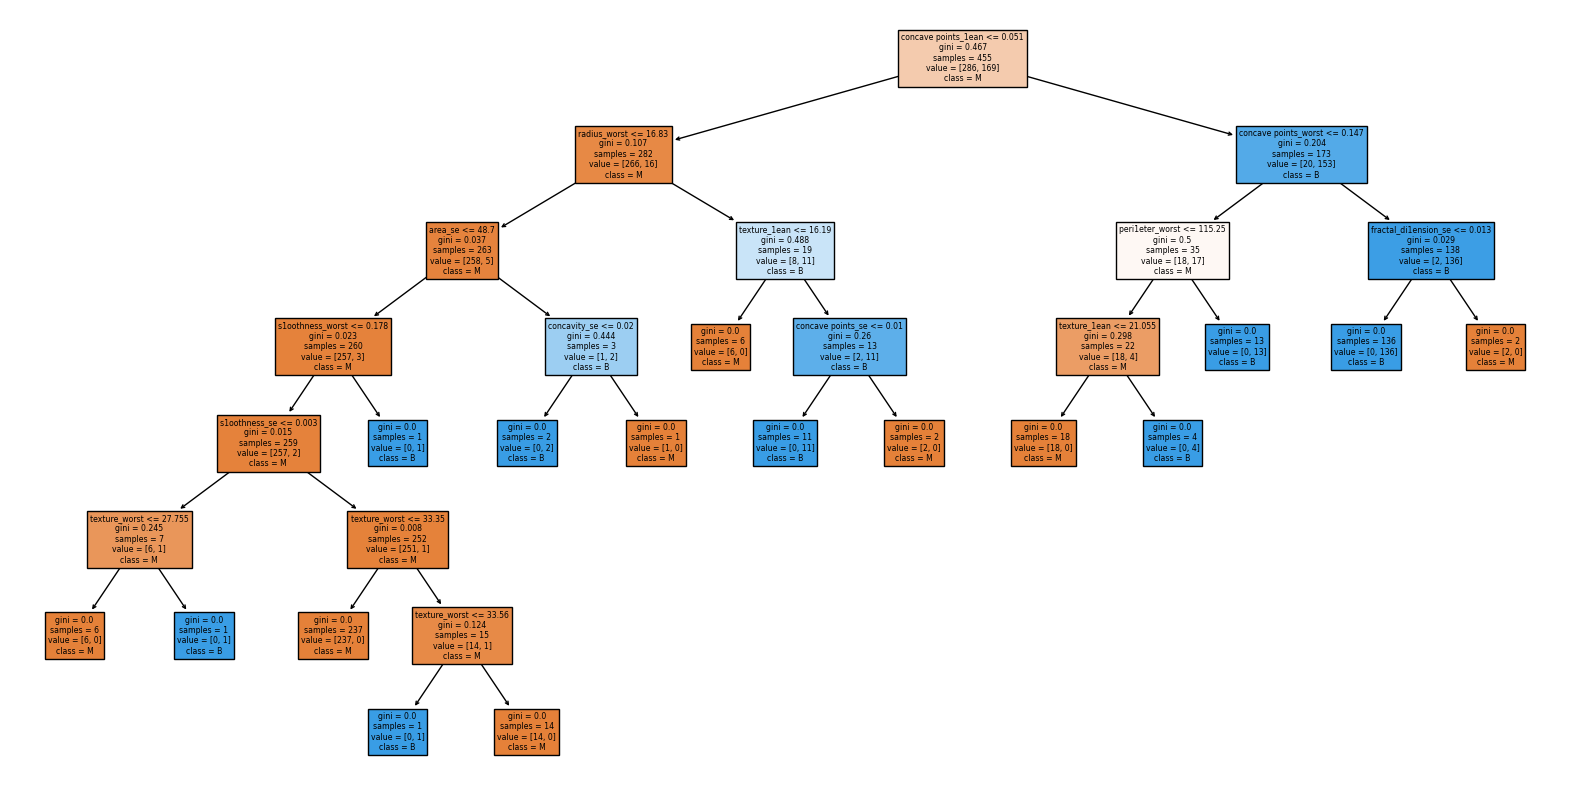

In [28]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["M", "B"], filled=True)
plt.show()

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.74%
